# <center>Project 03: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: **Huỳnh Sĩ Luân**
- MSSV: **23127086**
- Lớp: **23CLC05**

# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Import thêm dữ thư viện nếu cần

# Đọc dữ liệu

In [2]:
# Đọc dữ liệu  bằng pandas
train = pd.read_csv('p03.train.csv')
test = pd.read_csv('p03.test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa 5 đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu huấn luyện)

X_test = test.iloc[:, :-1]      # Dataframe (chứa 5 đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng các khác nếu cần

# Cài đặt hàm

In [3]:
# Cài đặt các hàm cần thiết ở đây

*Chú thích: Cần có docstrings cho các hàm.*

# Yêu cầu 1: Phân tích khám phá dữ liệu

Statistics for column Hours Studied:
Data type: int64
Number of unique values: 9
Most common values:
 Hours Studied
1    1062
7    1012
6    1011
9    1000
3    1000
Name: count, dtype: int64
Descriptive statistics:
 count    9000.000000
mean        4.976444
std         2.594647
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max         9.000000
Name: Hours Studied, dtype: float64
Statistics for column Previous Scores:
Data type: int64
Number of unique values: 60
Most common values:
 Previous Scores
54    196
87    182
56    180
62    168
53    167
Name: count, dtype: int64
Descriptive statistics:
 count    9000.000000
mean       69.396111
std        17.369957
min        40.000000
25%        54.000000
50%        69.000000
75%        85.000000
max        99.000000
Name: Previous Scores, dtype: float64
Statistics for column Extracurricular Activities:
Data type: int64
Number of unique values: 2
Most common values:
 Extracurricular Activities
0    4557

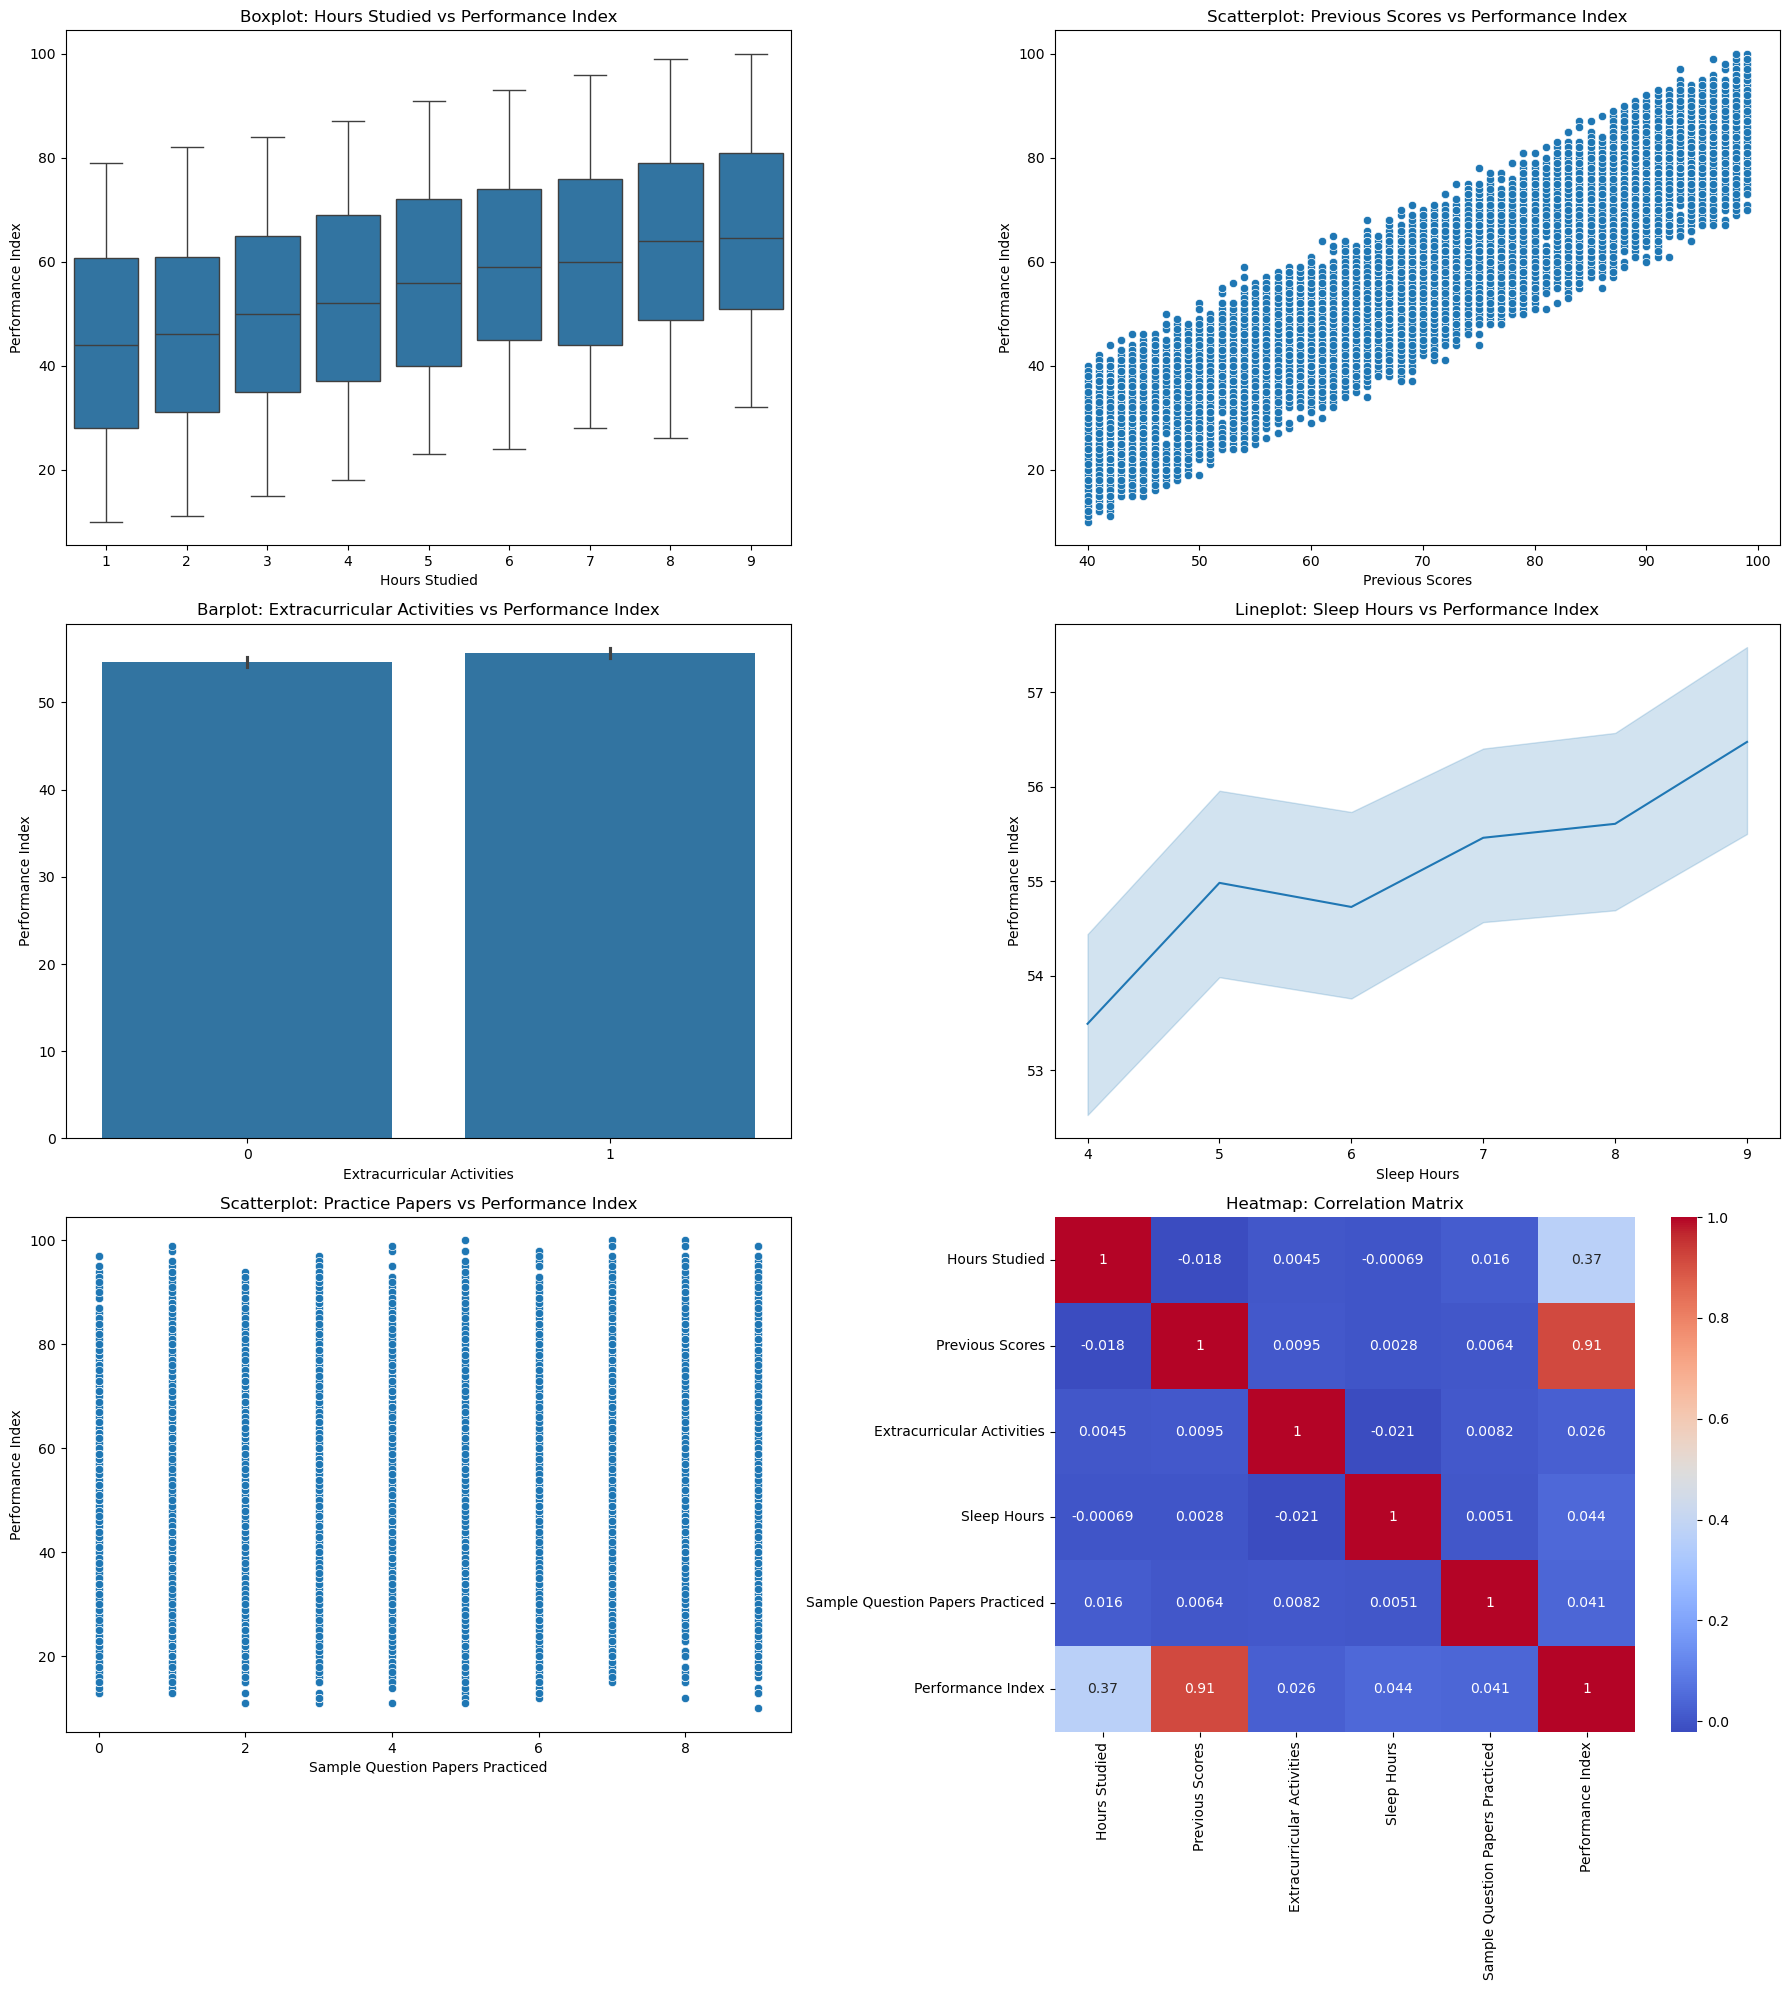

In [4]:
# Phân tích khám phá dữ liệu thông qua thống kê và các biểu đồ
# Sử dụng thống kê để phân tích dữ liệu các đặc trưng
def statistic(df, cols):
    '''
    Display basic statistics for selected columns in a DataFrame

    Parameters
    ----------
    df : pd.DataFrame
        Input dataset
    cols : list of str
        List of column names to analyze
    '''
    for col in cols:
        print(f"Statistics for column {col}:")
        print("Data type:", df[col].dtype)
        print("Number of unique values:", df[col].nunique())
        print("Most common values:\n", df[col].value_counts().head())
        if pd.api.types.is_numeric_dtype(df[col]):
            print("Descriptive statistics:\n", df[col].describe())

# Sử dụng biểu đồ (bar, box, heatmap, scatter, line...) để phân tích/quan sát các đặc trưng
def show_chart(df):
    '''
    Generate multiple plots to visualize relationships and distributions in the dataset

    Parameters
    ----------
    df : pd.DataFrame
        Input dataset containing relevant features
    '''
    plt.figure(figsize=(18, 20))

    # Boxplot: So sánh phân bố điểm theo số giờ học
    plt.subplot(3, 2, 1)
    sns.boxplot(x="Hours Studied", y="Performance Index", data=df)
    plt.title("Boxplot: Hours Studied vs Performance Index")

    # Scatterplot: Mối quan hệ giữa điểm trước đây và chỉ số thành tích hiện tại
    plt.subplot(3, 2, 2)
    sns.scatterplot(x="Previous Scores", y="Performance Index", data=df)
    plt.title("Scatterplot: Previous Scores vs Performance Index")

    # Barplot: So sánh điểm giữa 2 nhóm (có/không tham gia hoạt động ngoại khóa)
    plt.subplot(3, 2, 3)
    sns.barplot(x="Extracurricular Activities", y="Performance Index", data=df)
    plt.title("Barplot: Extracurricular Activities vs Performance Index")

    # Lineplot: Xu hướng điểm theo số giờ ngủ mỗi ngày
    plt.subplot(3, 2, 4)
    sns.lineplot(x="Sleep Hours", y="Performance Index", data=df.sort_values("Sleep Hours"))
    plt.title("Lineplot: Sleep Hours vs Performance Index")

    # Scatterplot: Mối liên hệ giữa số đề đã luyện và chỉ số thành tích
    plt.subplot(3, 2, 5)
    sns.scatterplot(x="Sample Question Papers Practiced", y="Performance Index", data=df)
    plt.title("Scatterplot: Practice Papers vs Performance Index")

    # Heatmap: Ma trận tương quan giữa các đặc trưng
    plt.subplot(3, 2, 6)
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title("Heatmap: Correlation Matrix")
    
    # Căn chỉnh bố cục
    plt.tight_layout()
    plt.show()

statistic(train, ["Hours Studied", "Previous Scores", "Extracurricular Activities", "Sleep Hours", "Sample Question Papers Practiced", "Performance Index"])   
show_chart(train)            
# Chỉ được phân tích trên tập huấn luyện

# Yêu cầu 2a: Xây dựng mô hình sử dụng toàn bộ 5 đặc trưng đề bài cung cấp

In [5]:
# Phần code cho yêu cầu 2a
def train_model(X_train, y_train):
    '''
    Train a Linear Regression model and display its regression equation

    Parameters
    ----------
    X_train : pd.DataFrame
        Training feature set
    y_train : pd.Series
        Target values for training

    Returns
    -------
    model : LinearRegression
        Trained Linear Regression model
    '''
    # Khởi tạo và huấn luyện
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Lấy hệ số và intercept
    coefs = model.coef_
    intercept = model.intercept_
    features = X_train.columns
    
    # In công thức mô hình
    print("Regression Model Formula:")
    formula = f"Performance Index = {intercept:.3f}"
    for feat, coef in zip(features, coefs):
        formula += f" + ({coef:.3f} × {feat})"
    print(formula)
    
    return model

model = train_model(X_train, y_train)

Regression Model Formula:
Performance Index = -33.969 + (2.852 × Hours Studied) + (1.018 × Previous Scores) + (0.604 × Extracurricular Activities) + (0.474 × Sleep Hours) + (0.192 × Sample Question Papers Practiced)


In [6]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
def evaluate_model_mae(model, X_test, y_test):
    '''
    Evaluate a regression model using Mean Absolute Error (MAE)

    Parameters
    ----------
    model : LinearRegression
        Trained regression model
    X_test : pd.DataFrame
        Test feature set
    y_test : pd.Series 
        Actual target values for testing
    '''
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"MAE on the test set: {mae:.3f}")
    
evaluate_model_mae(model, X_test, y_test)

MAE on the test set: 1.596


Công thức hồi quy, phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = ...$$

# Yêu cầu 2b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng, tìm mô hình cho kết quả tốt nhất

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [7]:
# Phần code cho yêu cầu 2b
# Tìm ra đặc trưng tốt nhất (trong 5 đặc trưng)
def find_best_single_feature(X_train, y_train, k=5, random_state=42):
    '''
    Identify the single feature with the lowest MAE

    Parameters
    ----------
    X_train : pd.DataFrame
        Training feature set
    y_train : pd.Series
        Target values
    k : int, optional (default=5)
        Number of folds for Cross Validation
    random_state : int, optional (default=42)
        Random seed for reproducibility

    Returns
    -------
    best_feature : str
        Name of the feature with the lowest MAE
    mae_scores : list of float
        List of MAE scores for each feature
    '''
    # Tạo đối tượng k-fold với xáo trộn (shuffle=True), random_state để kết quả tái lập
    kf = KFold(n_splits=k, shuffle=True, random_state=random_state)
    features = X_train.columns
    
    # Duyệt từng đặc trưng để cross-validation
    mae_scores = []
    for feature in features:
        X_single = X_train[[feature]]
        model = LinearRegression()
        scores = -cross_val_score(model, X_single, y_train, cv=kf, scoring='neg_mean_absolute_error')
        avg_score = np.mean(scores)
        mae_scores.append(avg_score)
       
    # In ra các kết quả cross-validation như yêu cầu
    print("No.\tSingle-feature model\t\t\tMAE")
    for idx, (feature, score) in enumerate(zip(features, mae_scores), start=1):
        print(f"{idx}\t{feature:35}\t{score:.3f}")
    
    # Tìm đặc trưng tốt nhất
    best_idx = np.argmin(mae_scores)
    best_feature = features[best_idx]
    print(f"The best feature is: {best_feature} with MAE = {mae_scores[best_idx]:.3f}")
    
    return best_feature, mae_scores

best_feature, mae_scores = find_best_single_feature(X_train, y_train, k=5)

No.	Single-feature model			MAE
1	Hours Studied                      	15.449
2	Previous Scores                    	6.618
3	Extracurricular Activities         	16.196
4	Sleep Hours                        	16.187
5	Sample Question Papers Practiced   	16.188
The best feature is: Previous Scores with MAE = 6.618


In [8]:
# Huấn luyện lại mô hình best_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
def best_feature_model(X_train, y_train, X_test, best_feature):
    '''
    Train a Linear Regression model using only the best feature

    Parameters
    ----------
    X_train : pd.DataFrame
        Training feature set
    y_train : pd.Series 
        Target values
    X_test : pd.DataFrame
        Test feature set
    best_feature : str
        Name of the best feature

    Returns
    -------
    model : LinearRegression
        Trained model
    X_test_best : pd.DataFrame
        Test data containing only the best feature
    '''
    X_train_best = X_train[[best_feature]]
    X_test_best = X_test[[best_feature]]

    # Khởi tạo và huấn luyện
    model = LinearRegression()
    model.fit(X_train_best, y_train)

    # In công thức mô hình
    print(f"Model formula: y = {model.coef_[0]:.3f} * ({best_feature}) + ({model.intercept_:.3f})")

    return model, X_test_best

best_model, X_test_best = best_feature_model(X_train, y_train, X_test, best_feature)

Model formula: y = 1.011 * (Previous Scores) + (-14.989)


In [9]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_feature_model
# Dự đoán và tính MAE trên test
evaluate_model_mae(best_model, X_test_best, y_test)

MAE on the test set: 6.544


Công thức hồi quy (dựa trên mô hình đặc trưng tốt nhất), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = ...$$

# Yêu cầu 2c: Sinh viên tự xây dựng/thiết kế mô hình, tìm mô hình cho kết quả tốt nhất

## Xây dựng/Thiết kế mô hình

In [10]:
# Trình bày toàn bộ code liên quan đến việc thiết kế mô hình
# Mô hình 1: Sử dụng 2 đặc trưng gốc
X_model_1 = X_train[["Previous Scores", "Hours Studied"]]

# Mô hình 2: Tạo đặc trưng mới bằng cách nhân 2 đặc trưng
X_model_2 = (X_train["Hours Studied"] * X_train["Sleep Hours"]).to_frame(name="Interaction")

# Mô hình 3: Tạo đặc trưng bằng cách biến đổi bình phương
X_model_3 = (X_train["Previous Scores"] ** 2).to_frame(name="Squared")

## Tìm mô hình cho kết quả tốt nhất

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

In [11]:
# Phần code cho yêu cầu 2c
# Tìm ra mô hình tốt nhất (trong m mô hình mà sinh viên tự thiết kế)
def evaluate_models(X_model_1, X_model_2, X_model_3, y_train, k=5, random_state=42):
    '''
    Evaluate three models using Cross Validation and compare their MAE

    Parameters
    ----------
    X_model_1, X_model_2, X_model_3 : pd.DataFrame
        Feature sets for three different models
    y_train : pd.Series 
        Target values
    k : int, optional (default=5)
        Number of folds for Cross Validation
    random_state : int, optional (default=42)
        Random seed for reproducibility.

    Returns
    -------
    tuple of float
        MAE scores for the three models
    '''
    # Tạo đối tượng k-fold
    kf = KFold(n_splits=k, shuffle=True, random_state=random_state)
    
    # Model 1
    mae_model_1 = -cross_val_score(LinearRegression(), X_model_1, y_train, cv=kf, scoring='neg_mean_absolute_error').mean()
    print("Model 1: Using 2 original features")
    print(f"Average MAE (cross-validation): {mae_model_1:.3f}\n")

    # Model 2
    mae_model_2 = -cross_val_score(LinearRegression(), X_model_2, y_train, cv=kf, scoring='neg_mean_absolute_error').mean()
    print("Model 2: Multiplication of 2 features")
    print(f"Average MAE (cross-validation): {mae_model_2:.3f}\n")

    # Model 3
    mae_model_3 = -cross_val_score(LinearRegression(), X_model_3, y_train, cv=kf, scoring='neg_mean_absolute_error').mean()
    print("Model 3: Squared feature")
    print(f"Average MAE (cross-validation): {mae_model_3:.3f}\n")

    return mae_model_1, mae_model_2, mae_model_3

mae_model_1, mae_model_2, mae_model_3 = evaluate_models(X_model_1, X_model_2, X_model_3, y_train, k=5)

Model 1: Using 2 original features
Average MAE (cross-validation): 1.816

Model 2: Multiplication of 2 features
Average MAE (cross-validation): 15.598

Model 3: Squared feature
Average MAE (cross-validation): 6.767



In [12]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện
# Tìm đặc trưng tốt nhất
def best_combined_model(mae_list, feature_names, X_model_list, y_train, X_test):
    '''
    Select and train the best model from multiple candidates

    Parameters
    ----------
    mae_list : list of float
        List of MAE scores for each model
    feature_names : list of str
        Names of features used in each model
    X_model_list : list of pd.DataFrame
        Training feature sets for each model
    y_train : pd.Series 
        Target values
    X_test : pd.DataFrame
        Test feature set

    Returns
    -------
    best_model : LinearRegression
        Trained best model.
    X_test_best : pd.DataFrame
        Test data for the best model
    best_idx : int
        Index of the best model
    '''
    # Chọn mô hình tốt nhất
    best_idx = np.argmin(mae_list)
    print(f"Best model: {feature_names[best_idx]} with MAE = {mae_list[best_idx]:.3f}")

    # Lấy dữ liệu train/test
    X_train_best = X_model_list[best_idx]
    X_test_best = X_test[X_train_best.columns]

    # Huấn luyện mô hình
    best_model = LinearRegression()
    best_model.fit(X_train_best, y_train)

    # In công thức 
    print(f"Model formula: y = {best_model.coef_[0]:.3f} * ({feature_names[best_idx]}) + ({best_model.intercept_:.3f})")

    return best_model, X_test_best, best_idx

# Danh sách tên đặc trưng
feature_names = [
    "Previous Scores + Hours Studied",
    "Hours Studied * Sleep Hours",
    "(Previous Scores)^2"
]

# Danh sách MAE trung bình
mae_list = [mae_model_1, mae_model_2, mae_model_3]

# Danh sách Model
X_model_list = [X_model_1, X_model_2, X_model_3]

best_model, X_test_best, best_idx = best_combined_model(mae_list, feature_names, X_model_list, y_train, X_test)

Best model: Previous Scores + Hours Studied with MAE = 1.816
Model formula: y = 1.018 * (Previous Scores + Hours Studied) + (-29.747)


In [13]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model
evaluate_model_mae(best_model, X_test_best, y_test)

MAE on the test set: 1.839


Công thức hồi quy (dựa trên mô hình tốt nhất mà sinh viên tự xây dựng/thiết kế), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = ...$$